## Лабораторная работа №0 "О росте больных ковидом"

#### Выполнил студент группы МПИ-241 Нехаенко Владимир

#### Вариант 9. С ноября 2020 по февраль 2021

In [122]:
import math
from datetime import date

import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt

#### Подготовка данных

In [123]:
start_date = date(2020, 11, 1)
end_date = start_date + relativedelta(months=3)

dataframe = pd.read_csv('datasets/covid-data.csv', ).sort_values('date', ascending=True)
dataframe = dataframe[dataframe.apply(lambda row: start_date <= date.fromisoformat(row['date']) <= end_date, axis=1)]
dataframe

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
126,2020-11-01,223035.0,410,24457.0,9665.0,1166,47615.0,366110.0,41504027.0,228603,2797.0,2553.0,9207091.0,141974,56,151506495,1160138
125,2020-11-02,223510.0,475,24560.0,9957.0,1399,48750.0,367509.0,41787471.0,283444,2809.0,2633.0,9290545.0,83454,56,152745393,1238898
124,2020-11-03,225027.0,1517,24796.0,10538.0,3135,50509.0,370644.0,42043319.0,255848,2833.0,2734.0,9410494.0,119949,56,154014545,1269152
123,2020-11-04,226158.0,1131,25041.0,10892.0,3107,52166.0,373751.0,42245917.0,202598,2853.0,2832.0,9516490.0,105996,56,155332996,1318451
122,2020-11-05,227312.0,1154,25276.0,11050.0,2553,53380.0,376304.0,42548344.0,302427,2872.0,2876.0,9635513.0,119023,56,156894058,1561062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-01-28,423645.0,4011,41588.0,20113.0,3500,104303.0,696547.0,66430423.0,269667,4000.0,6642.0,25541644.0,157306,56,306066679,1936761
37,2021-01-29,427148.0,3503,41758.0,19609.0,2835,101003.0,699382.0,66714591.0,284168,4011.0,6483.0,25708755.0,167111,56,308021780,1955101
36,2021-01-30,430130.0,2982,41872.0,19130.0,3147,97561.0,702529.0,66946890.0,232299,4016.0,6329.0,25857579.0,148824,56,310161359,2139579
35,2021-01-31,432189.0,2059,41934.0,18968.0,2171,95013.0,704700.0,67171483.0,224593,4019.0,6291.0,25976946.0,119367,56,311887083,1725724


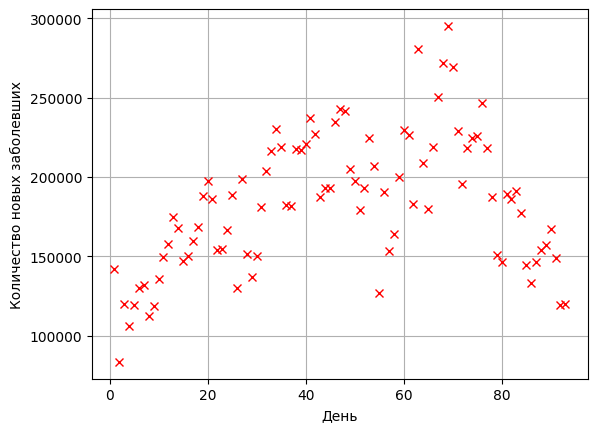

In [124]:
x = dataframe['positiveIncrease'].to_numpy()
t = np.array(range(1, len(x)+1))

plt.xlabel("День")
plt.ylabel("Количество новых заболевших")
plt.grid()
plt.plot(t, x, "rx")

#### Решение из курса "Методы анализа данных"

In [125]:
y = np.array(list(map(math.log, x)))
ty = t * y

t_mean = t.mean()
y_mean = y.mean()
ty_mean = ty.mean()

cov = ty_mean - t_mean * y_mean

t2 = t ** 2
dt = t2.mean() - t_mean ** 2

b = cov / dt
a = y_mean - b * t_mean
print(a, b)

11.944904244044483 0.0030866538277854313


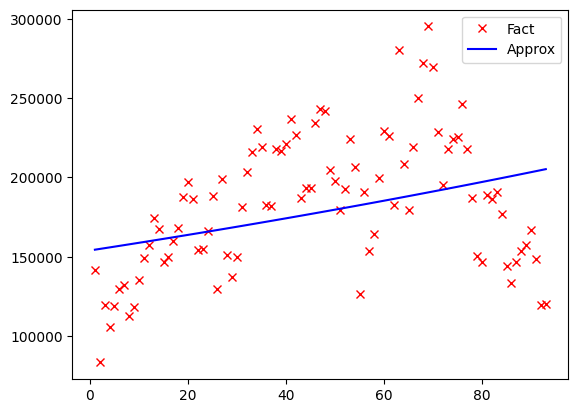

In [126]:
def approximate(t, a, b):
    exp_a = math.exp(a)
    return np.array(list(map(lambda ti: exp_a * math.exp(b * ti), t)))

def show_approximation(x, t, z): 
    plt.plot(t, x, 'rx', label='Fact')
    plt.plot(t, z, 'b-', label='Approx')
    plt.legend()
    plt.show()

z = approximate(t, a, b)
show_approximation(x, t, z)

#### Решение методом градиентного спуска

Функция линейной регрессии имеет вид: $f = \sum_{i=0}^{n} (y_i - (a + bt_i))^2 \rightarrow min$

Пусть $g = (y_i - (a + bt_i))^2 = y_i^2 - 2y_i(a + bt_i) + (a + bt_i)^2 = y_i^2 - 2y_ia - 2y_it_ib + a^2 + 2abt_i + b^2t_i^2 $,\
 тогда $f = \sum_{i=0}^{n} g \rightarrow min$\
 
Вычислим частные производные по $a$:\
$\frac{\partial g}{\partial a} = -2y_i + 2a + 2bt_i = -2(y_i - a - bt_i)$\
$\frac{\partial f}{\partial a} = -2\sum_{i=0}^{n} y_i - a - bt_i$

Вычислим частные производные по $b$:\
$\frac{\partial g}{\partial b} = - 2y_it_i + 2at_i + 2bt_i^2 = - 2t_i(y_i - a - bt_i) $\
$\frac{\partial f}{\partial b} = -2\sum_{i=0}^{n} t_i(y_i - a - bt_i) $

Градиент
$\nabla f = (\frac{\partial f}{\partial a}, \frac{\partial f}{\partial b}) = (-2\sum_{i=0}^{n} y_i - a - bt_i, -2\sum_{i=0}^{n} t_i(y_i - a - bt_i)$

In [204]:
import math


def df_da(a, b, y, t):
    def dg_da(yi, ti):
        return -2 * (yi - a - ti * b)

    return np.sum(np.fromiter(map(dg_da, y, t), dtype=float))


def df_db(a, b, y, t):
    def dg_db(yi, ti):
        return -2 * ti * (yi - a - ti * b)

    return np.sum(np.fromiter(map(dg_db, y, t), dtype=float))


def grad(a, b, y, t):
    return [df_da(a, b, y, t), df_db(a, b, y, t)]

#### Реализация градиентного спуска

In [205]:
class GradientDescent:
    def __init__(self, learning_rate: float, iterations_count: int, epsilon: float = 1e-06):
        self._learning_rate = learning_rate
        self._iterations_count = iterations_count
        self._epsilon = epsilon

    def __call__(self, y, t, start_a, start_b):
        params = np.array([start_a, start_b])
    
        for _ in range(self._iterations_count):
            params_shift = -self._learning_rate * np.array(grad(params[0], params[1], y, t))
            if np.all(np.abs(params_shift) <= self._epsilon):
                break
            params = np.add(params, params_shift)
        
        return params

#### Вычисление с помощью градиентного спуска

In [215]:
gradient_descent = GradientDescent(learning_rate=3.5e-6, iterations_count=100000, epsilon=1e-16)
a, b = gradient_descent(y, t, start_a=0, start_b=0)
print(a, b)

11.94490291496156 0.0030866751517614074


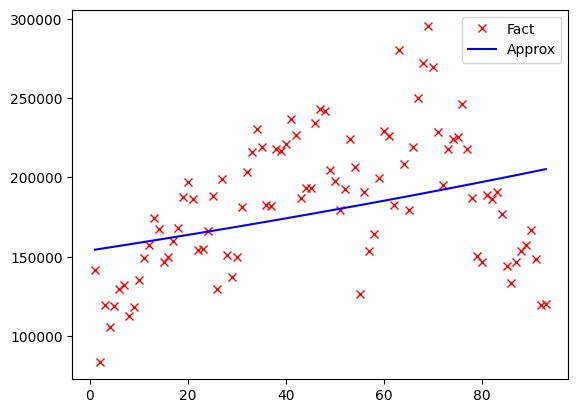

In [216]:
z = approximate(t, a, b)
show_approximation(x, t, z)

#### Проверка гипотезы о виде распределения с помощью критерия $X^2$

In [217]:
from scipy.stats import norm, chisquare
from itertools import product

eps = A * np.array(list(map(lambda ti: math.exp(b * ti), t))) - x
eps2 = eps ** 2

sigma = math.sqrt(eps2.mean() - eps.mean())

s = math.trunc(math.log2(len(x))) + 1

# Разбиение на интервалы
step = (eps.max() - eps.min()) / s
edges = [eps.min()]

for i in range(1, s + 1):
    edges.append(edges[i-1] + step)

edges[0] = -math.inf
edges.append(math.inf)

# Вычисление фактических частот
count = [0] * len(edges)

for i, j in product(range(1, len(edges)), eps):
    if edges[i-1] <= j < edges[i]:
        count[i] += 1

count.pop(0)

# Вычисление теоретических частот
p = [norm.cdf(edges[i] / sigma) - norm.cdf(edges[i-1] / sigma) for i in range(1, len(edges))]
n_t = np.array(p) * len(t)

k, p = chisquare(count, n_t, ddof=1)

print('k =', k)
print('p =', p)

if p > 0.05:
    print('Гипотеза подтверждается')
else:
    print('Гипотеза не подтверждается')

k = 3.427121695943479
p = 0.7536392348422628
Гипотеза подтверждается


#### Сравнение результатов
|   | Метод наименьших квадратов | Градиентный спуск     |
|---|----------------------------|-----------------------|
| a | 11.944904244044483         | 11.94490291496156     |
| b | 0.0030866538277854313      | 0.0030866751517614074 |
| p | 0.6604926118456349         | 0.7536392348422628    |

Значения параметров $a$ и $b$ в обоих случаях практически идентичны, однако коэффициент значимости $p$ полученный градиентным спуском выше, чем полученный методом наименьших квадратов, что может свидетельствовать о том, что градиентный спуск с оптимальными параметрами может быть эффективнее, чем метод наименьших квадратов.

#### Вывод

В ходе лабораторной работы были проанализированы данные о числе больных COVID-19 в мире за 3 месяца, а также проверена гипотеза о том, что рост числа больных описывается экспоненциальной функцией. Данная задача была решена с использованием градиентного спуска. Гипотеза подтвердилась. Было проведено сравнение текущих результатов с полученными методом наименьших квадратов.